In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl # <-- 'mpl' est un alias de 'matplotlib'
import matplotlib.pyplot as plt
import missingno as msno

# Une autre convention que vous avez sûrement déjà rencontré:
import numpy as np

In [2]:
data_titanic = "./Datasets/data_titanic.csv"
data_energy_nat = "./Datasets/df_nat.csv"

# Titanic Dataset

## Import data

In [3]:
# Load from the pickle file eco2mix
df_titanic = pd.read_csv(data_titanic)
df_titanic.sample(100) # take 100 samples at random

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C
836,837,0,3,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.6625,NaN,S
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
...,...,...,...,...,...,...,...,...,...,...,...,...
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
532,533,0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,NaN,C
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S


## Visualize Data

### <font color='purple'> Quelle est la répartition des passagers par classe ? </font>
-> Single categorical variable (une seule variable qualitative nominale)

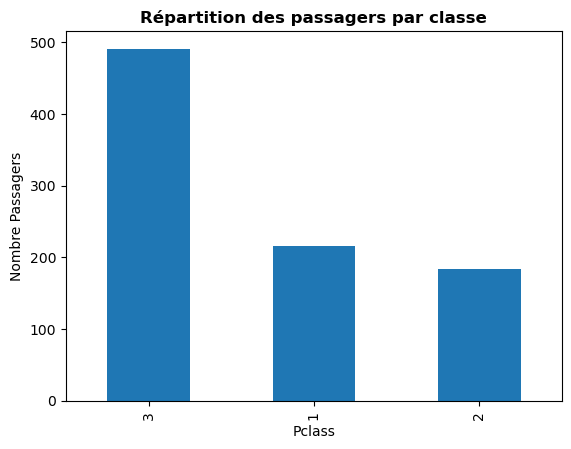

In [4]:
#histogramme
plt.title('Répartition des passagers par classe',fontsize=12,weight='bold')
#df_titanic = pd.DataFrame(df_titanic)
df = df_titanic[df_titanic.Pclass == 3]
titanic_groupe=df_titanic["Pclass"].value_counts()


plot = titanic_groupe.plot(kind='bar')
plt.ylabel('Nombre Passagers')
plt.show()

### <font color='purple'> Quelle est la répartition des passagers par sexe ? </font>
-> type of variable(s)?

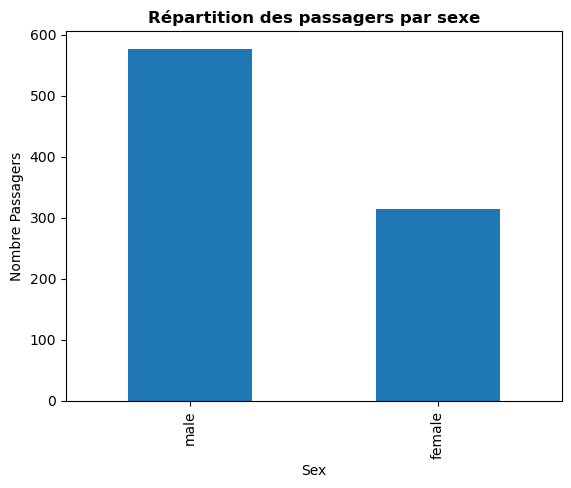

In [5]:
plt.title('Répartition des passagers par sexe',fontsize=12,weight='bold')
titanic_groupe=df_titanic["Sex"].value_counts()

plot = titanic_groupe.plot(kind='bar')
plt.ylabel('Nombre Passagers')
plt.show()

### <font color='purple'>Distribution des passagers selon âge et sexe </font>
-> type of variable(s)?

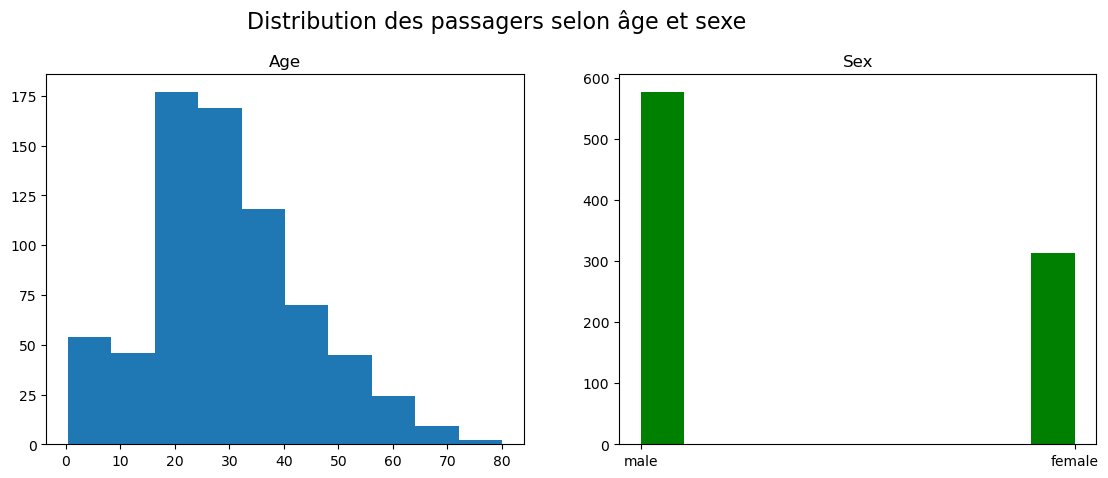

In [6]:
#BoxPlot

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.suptitle('Distribution des passagers selon âge et sexe', fontsize=16)
ax1.hist(df_titanic['Age'])
ax2.hist(df_titanic['Sex'], color='green')
ax1.set_title('Age')
ax2.set_title('Sex')
plt.subplots_adjust(left=0.2, wspace=0.2, top=0.85) # ajuster la position et l'espacement des graphes
plt.show()



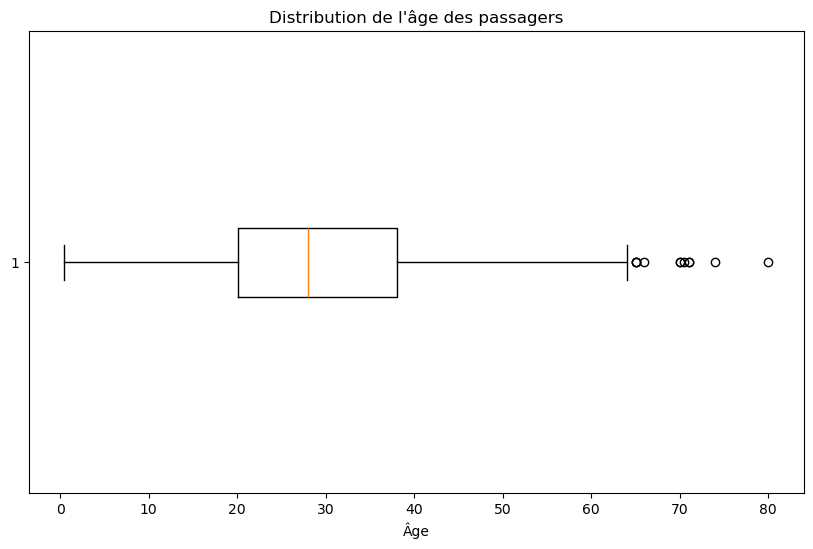

In [7]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_titanic['Age'].dropna(), vert=False)  # dropna() pour les valeurs manquantes
plt.title('Distribution de l\'âge des passagers')
plt.xlabel('Âge')
plt.show()

<Figure size 1200x600 with 0 Axes>

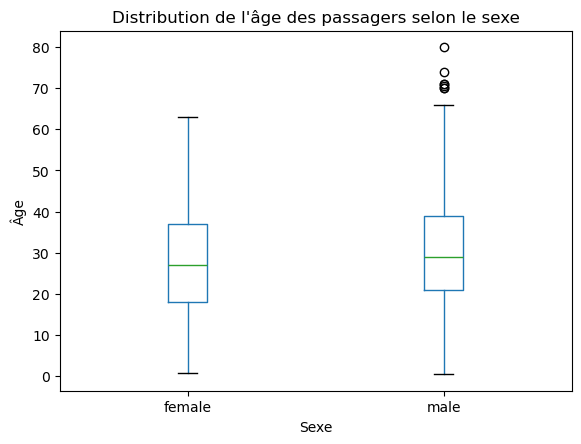

In [8]:
plt.figure(figsize=(12, 6))
df_titanic.boxplot(column='Age', by='Sex', grid=False)
plt.title('Distribution de l\'âge des passagers selon le sexe')
plt.suptitle('')  # Supprime le titre par défaut qui est ajouté par pandas
plt.xlabel('Sexe')
plt.ylabel('Âge')
plt.show()

### <font color='purple'>Quel est le taux de survie selon le sexe ? l’âge ? la classe ? </font>
-> type of variable(s)?

In [24]:
survival_rate_all_passengers = df_titanic['Survived'].value_counts()
print(survival_rate_all_passengers)

num_survivors = df_titanic[df_titanic['Survived'] == 1]['Survived'].count()
print(num_survivors)


num_nonsurvivors = df_titanic[df_titanic['Survived'] == 0]['Survived'].count()
print(num_survivors)


survivors = df_titanic[df_titanic['Survived'] == 1]
survivors_info = survivors[['Sex', 'Age', 'Pclass']].value_counts()
# Afficher les informations des survivants
print(survivors_info)



Survived
0    549
1    342
Name: count, dtype: int64
342
Sex     Age   Pclass
female  35.0  1         6
        24.0  2         6
              1         5
        30.0  1         5
male    32.0  3         5
                       ..
female  56.0  1         1
        55.0  2         1
        54.0  2         1
        53.0  1         1
male    80.0  1         1
Name: count, Length: 164, dtype: int64


### <font color='purple'> Y a-t-il un lien entre prix payé pour le billet et l’âge des passagers ? </font>
-> type of variable(s)?

# Energy Dataset

## Import data

In [12]:
df_nat = pd.read_csv(data_energy_nat)
df_nat.sample(100) # take 100 samples at random

,DateTime,Consommation,Fioul,Charbon,Gaz,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques
82327,2014-05-07 13:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38702,2013-02-07 03:30:00,66911.0,516.0,3755.0,3220.0,54388.0,3513.0,0.0,7519.0,-2357.0,749.0,-4394.0
143451,2016-02-03 06:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78293,2014-03-26 13:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191907,2017-06-22 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4935,2012-02-21 09:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8184,2012-03-26 06:00:00,45828.0,644.0,822.0,3443.0,45199.0,2429.0,0.0,3514.0,-507.0,699.0,-10415.0
144220,2016-02-11 07:00:00,71298.0,220.0,1436.0,5359.0,55669.0,1248.0,-1.0,10986.0,-18.0,1034.0,-4634.0
9032,2012-04-04 02:00:00,50035.0,375.0,1756.0,959.0,50080.0,922.0,0.0,3777.0,-1727.0,610.0,-6716.0


## Visualize Data

### <font color='purple'> Quels sont les types de variables ? Décrivez-les à l'aide d'un graphique. </font>

https://plotly.com/python/


Matplotlib: https://www.youtube.com/watch?v=O_OeWxpnUc0&t=348s

Seaborn: https://www.youtube.com/watch?v=6GUZXDef2U0

In [18]:
import plotly.express as px

fig = px.box(df_nat)
fig.show()



ValueError: Plotly Express cannot process wide-form data with columns of different type.

### <font color='purple'> Quelle est l'évolution de la consommation ? </font>

In [ ]:
plt.figure(figsize=(12, 6))

plt.title('évolution de la consommation')
plt.suptitle('')  # Supprime le titre par défaut qui est ajouté par pandas
plt.xlabel('Années')
plt.ylabel('Energie')
plt.show()

DateTime             Consommation  Fioul  Charbon  Gaz     Nucléaire  Eolien  Solaire  Hydraulique  Pompage  Bioénergies  Ech. physiques
2012-01-01 00:00:00  58315.0       492.0   25.0    3816.0  52697.0    3588.0   0.0     7922.0       -1139.0  719.0        -9806.0                1
2016-08-31 14:00:00  54871.0       115.0   1082.0  4449.0  37736.0    289.0    4096.0  6380.0       -21.0    905.0        -160.0                 2
2016-08-31 20:00:00  50360.0       120.0   1452.0  4458.0  37656.0    1035.0   159.0   6745.0       -20.0    939.0        -2184.0                3
2016-08-31 19:30:00  51561.0       117.0   1456.0  4425.0  37664.0    1080.0   489.0   7513.0       -20.0    933.0        -2094.0                4
2016-08-31 19:00:00  52104.0       116.0   1461.0  4424.0  37647.0    1094.0   983.0   7786.0       -20.0    926.0        -2312.0                5
                                                                                                                                

KeyError: "None of [Index([     1,      2,      3,      4,      5,      6,      7,      8,      9,\n           10,\n       ...\n       122727, 122728, 122729, 122730, 122731, 122732, 122733, 122734, 122735,\n       122736],\n      dtype='int64', length=122736)] are in the [columns]"

<Figure size 1200x600 with 0 Axes>

### <font color='purple'> Quand a-t-on a un excédant / un déficit de production ? </font>

### <font color='purple'> Y a-t-il une corrélation entre les différents types de production ? </font>